# GitHub Profile Picture Generator with Image Thresholding

Create a GitHub profile picture using Python's OpenCV package. The project utilizes various image processing methods:

1. Conversion to black-and-white.
2. Global thresholding.
3. Adaptive Mean Thresholding.
4. Adaptive Gaussian Thresholding.

The final profile picture is selected from the Adaptive Gaussian Thresholding results.

In [44]:
# Import necessary packages

import numpy as np
import matplotlib.pyplot as plt
from EC_CV import *
%config InlineBackend.figure_formats = 'retina'
from matplotlib import rcParams
import cv2

rcParams['figure.figsize'] = (8, 6)


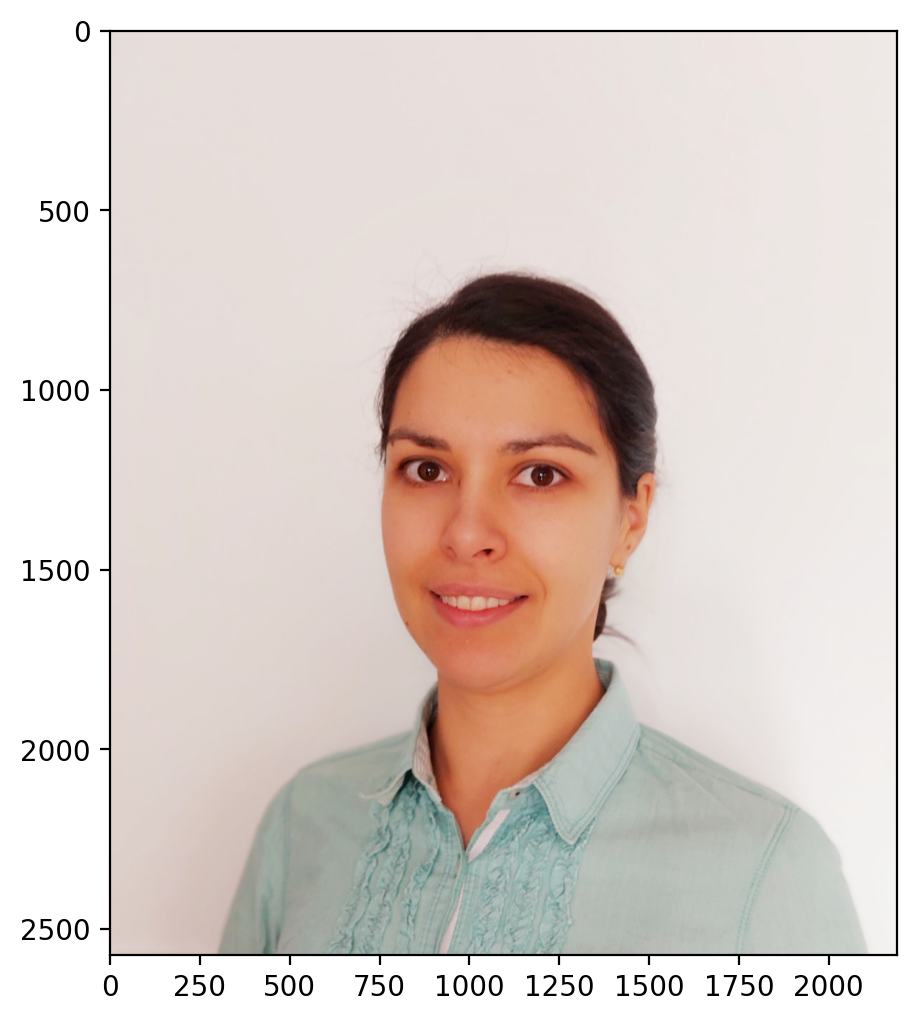

In [49]:
# Step #1: Print the original color image
#

image = plt.imread('20230215_102126.jpg')
plt.imshow(image)

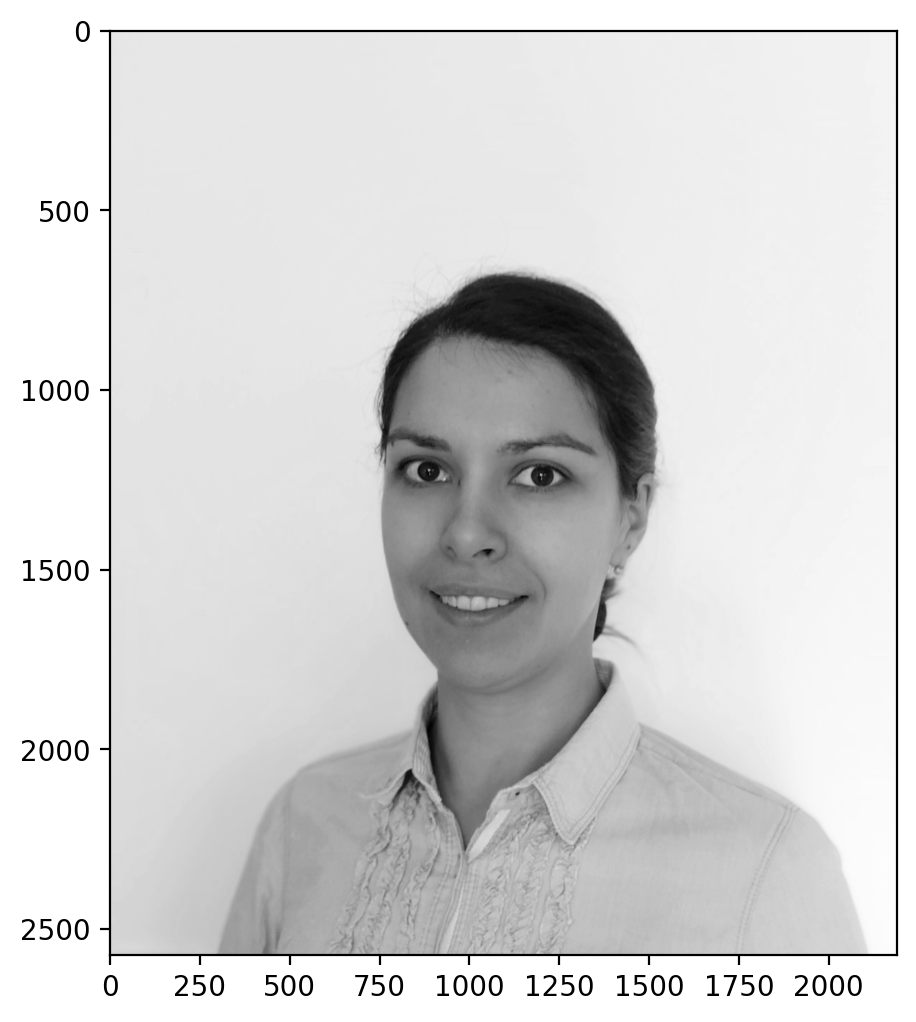

In [51]:
# Step #2: Convert the color image to grayscale.
#

gs_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gs_image, cmap='gray')

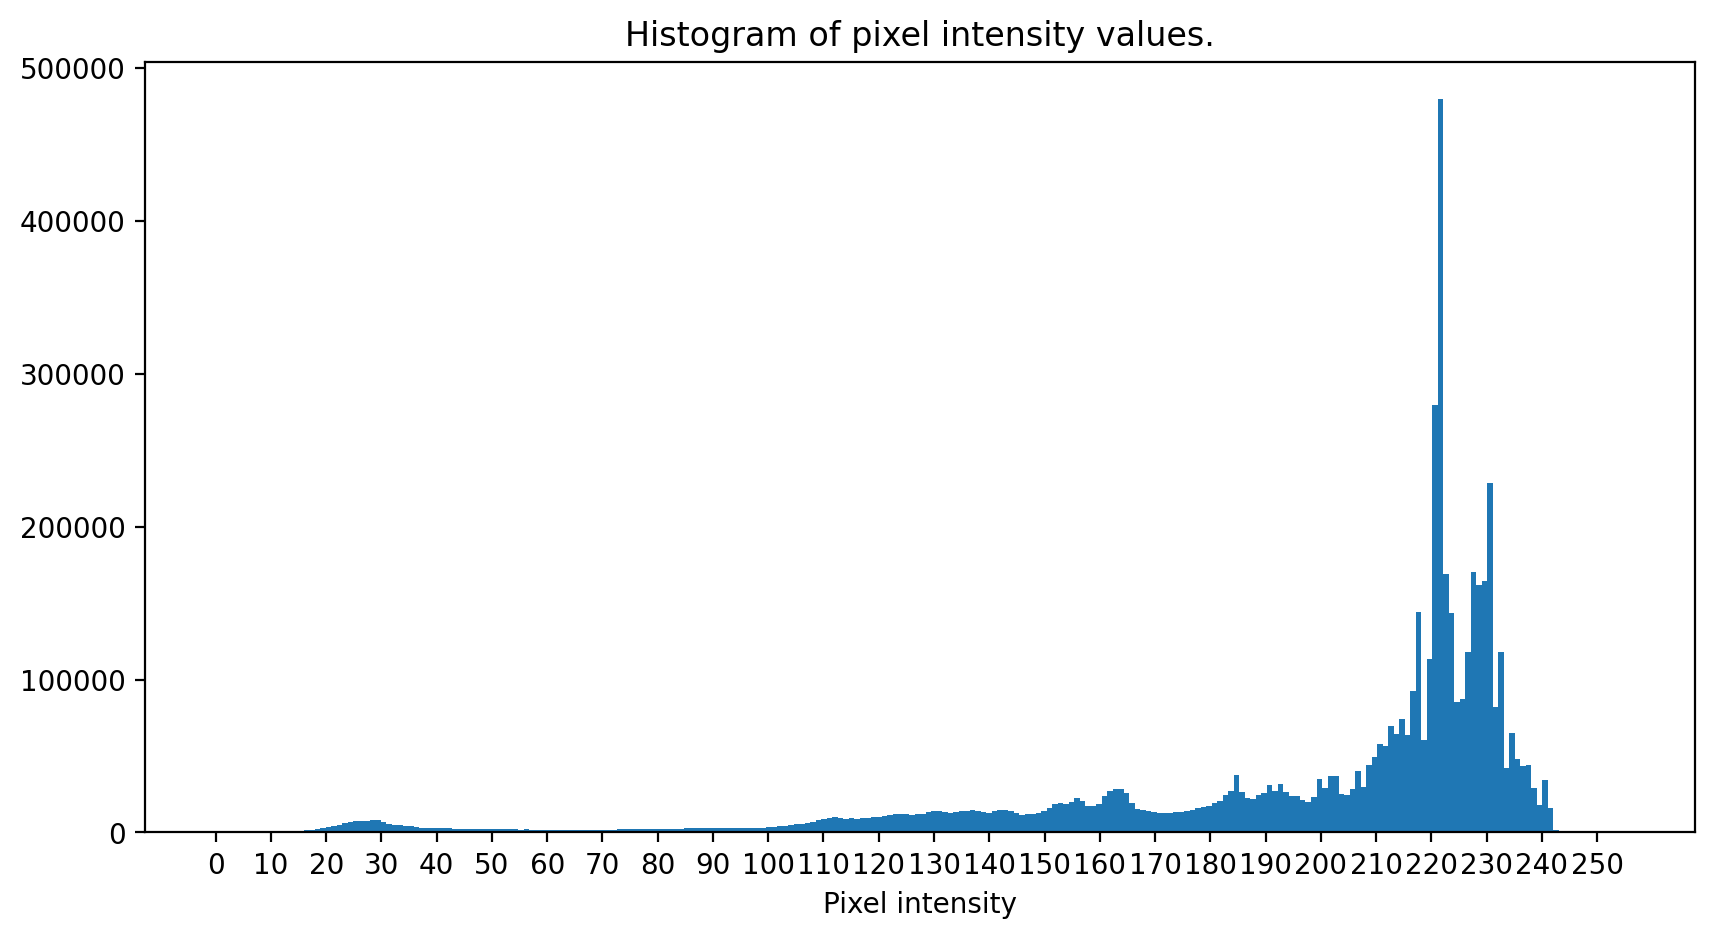

In [53]:
# Step #3: Plot a histogram 
#
# Plotting a histogram of the grayscale image
# to try to come up with a suitable global threshold.
#

# Set the figure size to 10 inches by 5 inches
rcParams['figure.figsize'] = (10, 5)

# Plot the histogram of the image by converting the 2D image into a 1D array
plt.hist(gs_image.ravel(), 256, [0, 255])

# Set the title of the plot
plt.title('Histogram of pixel intensity values.')

# Set custom tick mark values and labels
plt.xticks(np.arange(0, 255, 10))
plt.xlabel('Pixel intensity')

# Show the plot
plt.show()

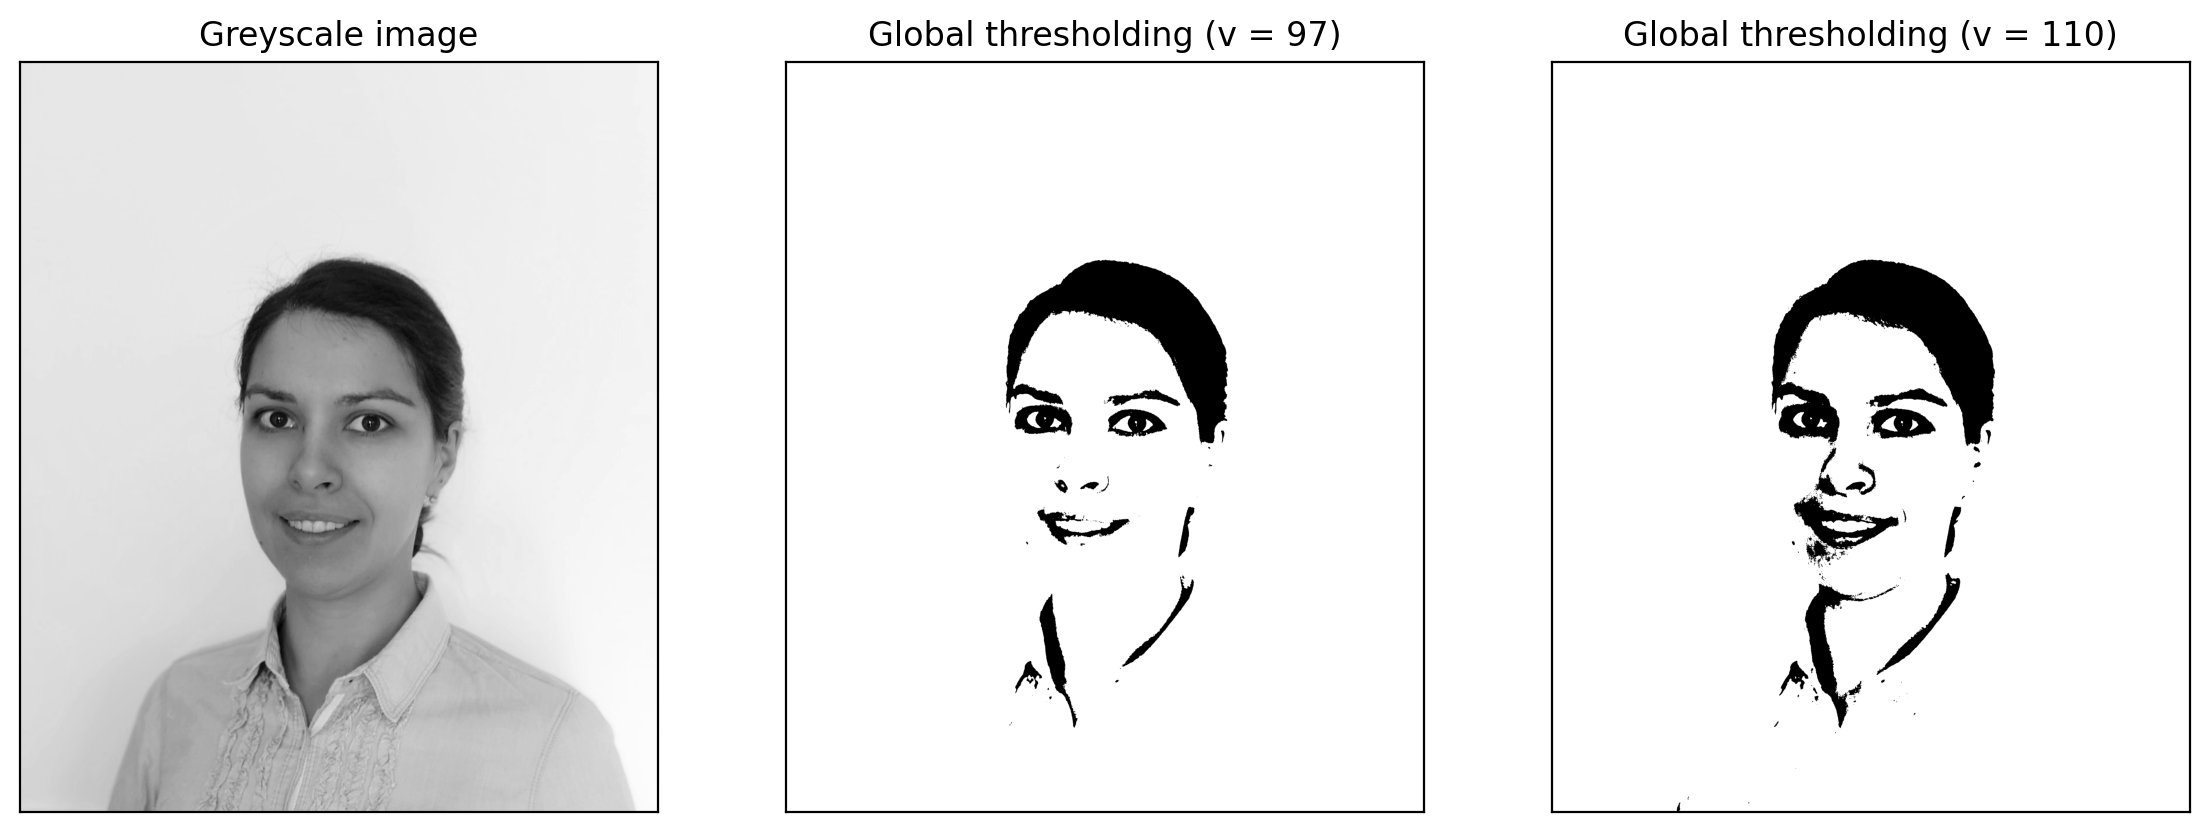

In [90]:
# Step #4: Convert to Black and White Image using Global Thresholding
#
# Picking two global thresholds from the histogram above and comparing  
# the resulting images. 

threshold1 = 97
threshold2 = 110

# Convert the image to black-and-white using Global Thresholding
bw_image1 = cv2.threshold(gs_image,threshold1,255,cv2.THRESH_BINARY)[1].astype(np.uint8)
bw_image2 = cv2.threshold(gs_image,threshold2,255,cv2.THRESH_BINARY)[1].astype(np.uint8)

# Compare the images so far
fig, ax = plt.subplots(1, 3, figsize=(14, 7)) 
titles = ['Greyscale image', 'Global thresholding (v = '+str(threshold1)+')', 'Global thresholding (v = '+str(threshold2)+')']
images = [gs_image, bw_image1, bw_image2]
for i in range(len(images)):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

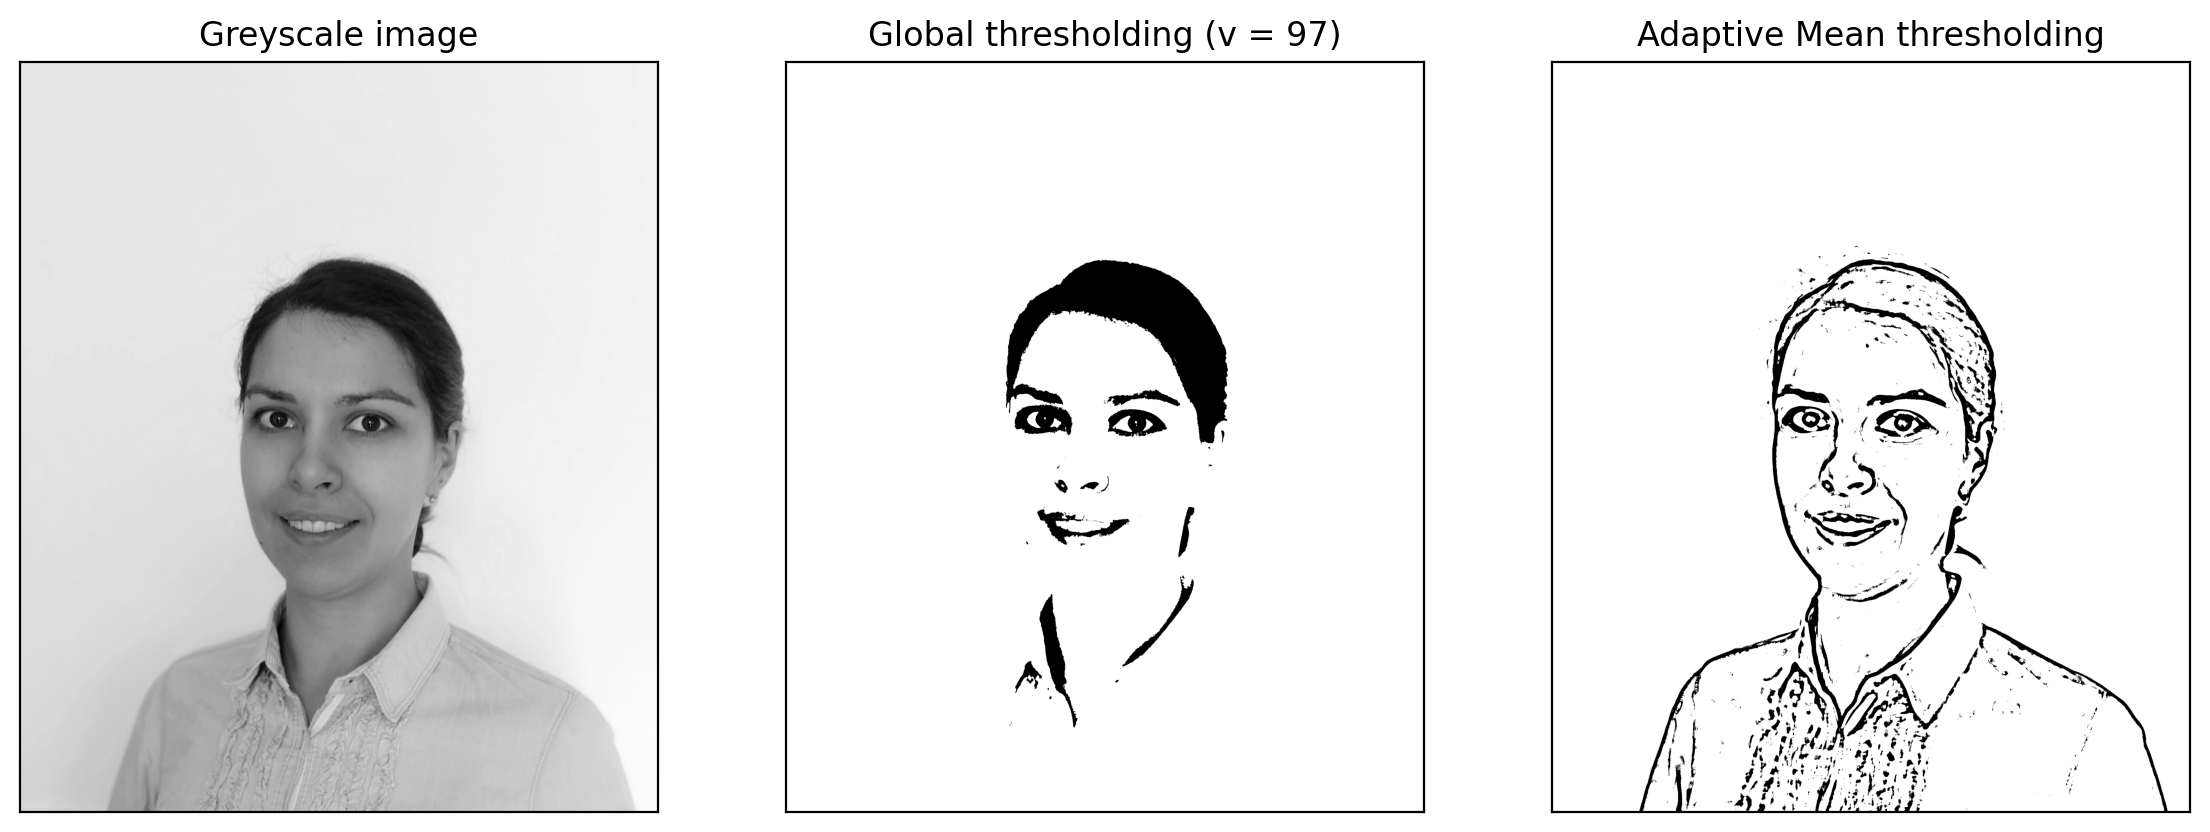

In [99]:
# Step #5: Convert to Black and White Image using Adaptive Mean Thresholding
#

gs_image_blurred = cv2.medianBlur(gs_image, 21)
am_image = cv2.adaptiveThreshold(gs_image_blurred,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,23,2)

# Compare the images so far
fig, ax = plt.subplots(1, 3, figsize=(14, 7)) 
titles = ['Greyscale image', 'Global thresholding (v = '+str(threshold1)+')', 'Adaptive Mean thresholding']
images = [gs_image, bw_image1, am_image]
for i in range(len(images)):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

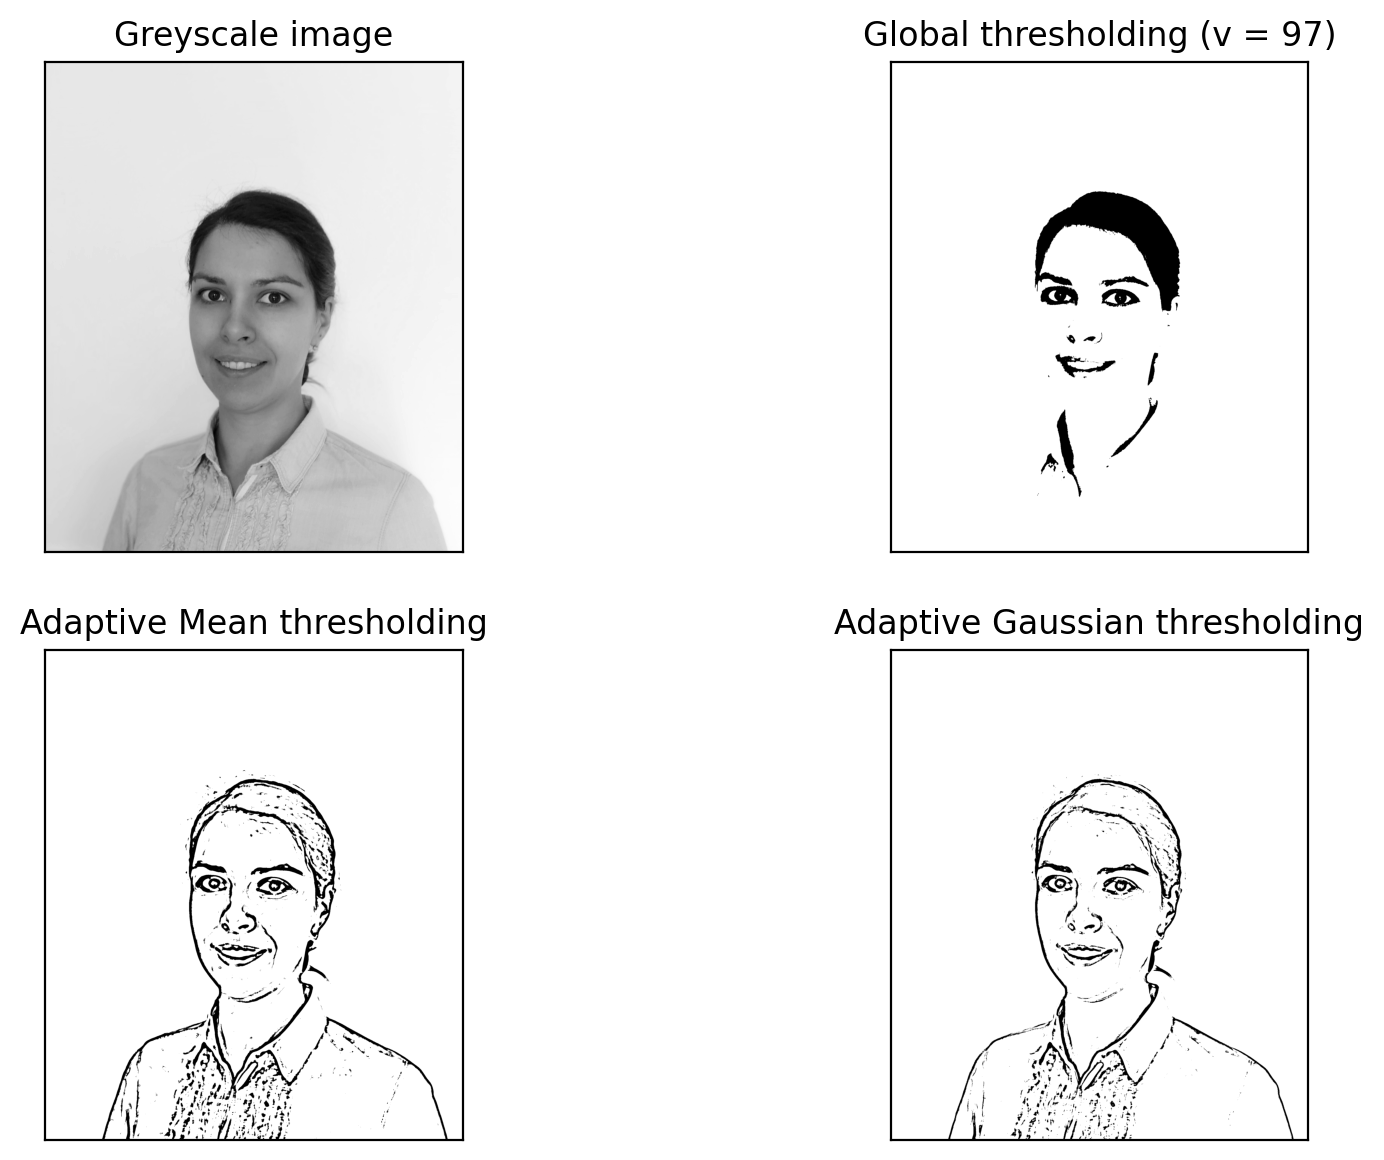

In [119]:
# Step #5: Convert to Black and White Image using Gaussian Thresholding
#

ag_image = cv2.adaptiveThreshold(gs_image_blurred,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,33,2)

# Compare the images so far
fig, ax = plt.subplots(2, 2, figsize=(10, 7)) 
titles = ['Greyscale image', 'Global thresholding (v = '+str(threshold1)+')', 'Adaptive Mean thresholding', 
          'Adaptive Gaussian thresholding']
images = [gs_image, bw_image1, am_image, ag_image]
for i in range(len(images)):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [121]:
# Save the image
cv2.imwrite('profile pic gaussian.jpg', ag_image)

True